In [16]:
import os
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [23]:
 def preprocess_label(patient_label):
    et = patient_label == 4
    et_present = 1 if np.sum(et) >= 1 else 0
    tc = np.logical_or(patient_label == 4, patient_label == 1)
    wt = np.logical_or(tc, patient_label == 2)
    patient_label = np.stack([et, tc, wt])
    patient_label = patient_label[:, 38:198, 32:224, :]
    return patient_label

In [24]:
def preprocess_data(data, norm=True):
    if norm:
        data = data/data.mean()
    data = data[38:198, 32:224, :]
    #data = np.pad(data, ((8,8), (8,8), (0,0)), 'constant', constant_values=0)
    return data

In [25]:
# preprocessing: divide each case by the mean
data_types = ['train', 'test', 'val']
start_idx = 50
end_idx = 130
for data_type in data_types:
    data_dir = f'/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/{data_type}'
    save_dir = f'/mnt/raid/jiang/projects/SubtleGAN/data/brats2021_slices_crop192x160/{data_type}'
    cases = glob.glob(f"{data_dir}/Bra*")
    for case in tqdm(cases):
        print(case)
        case_name = case.split("/")[-1]
        save_case_dir = os.path.join(save_dir, case_name)
        os.makedirs(save_case_dir, exist_ok=True)
        t1 = preprocess_data(nib.load(glob.glob(f"{case}/*_t1.nii.gz")[0]).get_fdata())
        t1ce = preprocess_data(nib.load(glob.glob(f"{case}/*_t1ce.nii.gz")[0]).get_fdata())
        t2 = preprocess_data(nib.load(glob.glob(f"{case}/*_t2.nii.gz")[0]).get_fdata())
        flair = preprocess_data(nib.load(glob.glob(f"{case}/*_flair.nii.gz")[0]).get_fdata())
        label = preprocess_label(nib.load(glob.glob(f"{case}/*_seg.nii.gz")[0]).get_fdata())
        for idx in range(start_idx, end_idx):
            slice_i = np.stack([t1[:, :, idx], t1ce[:, :, idx], t2[:, :, idx], flair[:, :, idx]], axis=0)
            slice_i = np.concatenate([slice_i, label[:, :, :, idx]])
            fn = os.path.join(save_case_dir, f"{idx:03d}.npy")
            np.save(fn, slice_i)

  0%|          | 0/1123 [00:00<?, ?it/s]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01513


  0%|          | 1/1123 [00:01<29:43,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00030


  0%|          | 2/1123 [00:03<27:47,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00149


  0%|          | 3/1123 [00:04<27:21,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00809


  0%|          | 4/1123 [00:06<29:39,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01410


  0%|          | 5/1123 [00:07<28:33,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01571


  1%|          | 6/1123 [00:09<29:51,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01140


  1%|          | 7/1123 [00:10<27:48,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00397


  1%|          | 8/1123 [00:12<28:34,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01228


  1%|          | 9/1123 [00:13<27:58,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00596


  1%|          | 10/1123 [00:15<28:51,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00021


  1%|          | 11/1123 [00:16<26:56,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00797


  1%|          | 12/1123 [00:18<28:19,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00517


  1%|          | 13/1123 [00:19<27:10,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01585


  1%|          | 14/1123 [00:21<27:42,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01340


  1%|▏         | 15/1123 [00:22<27:03,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01107


  1%|▏         | 16/1123 [00:23<26:32,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00504


  2%|▏         | 17/1123 [00:25<25:08,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00792


  2%|▏         | 18/1123 [00:26<27:00,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01572


  2%|▏         | 19/1123 [00:28<27:49,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01043


  2%|▏         | 20/1123 [00:29<27:13,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00810


  2%|▏         | 21/1123 [00:31<29:37,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00269


  2%|▏         | 22/1123 [00:33<29:30,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01534


  2%|▏         | 23/1123 [00:34<28:40,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01354


  2%|▏         | 24/1123 [00:36<27:02,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01359


  2%|▏         | 25/1123 [00:37<26:27,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01119


  2%|▏         | 26/1123 [00:39<26:37,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01598


  2%|▏         | 27/1123 [00:41<29:33,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00410


  2%|▏         | 28/1123 [00:42<29:28,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00347


  3%|▎         | 29/1123 [00:44<29:39,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01596


  3%|▎         | 30/1123 [00:46<31:10,  1.71s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00152


  3%|▎         | 31/1123 [00:47<30:20,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01204


  3%|▎         | 32/1123 [00:49<29:29,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00828


  3%|▎         | 33/1123 [00:51<30:51,  1.70s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00524


  3%|▎         | 34/1123 [00:52<30:21,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01656


  3%|▎         | 35/1123 [00:54<30:54,  1.70s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00675


  3%|▎         | 36/1123 [00:55<29:19,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01426


  3%|▎         | 37/1123 [00:57<27:38,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01618


  3%|▎         | 38/1123 [00:58<27:46,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01318


  3%|▎         | 39/1123 [01:00<26:29,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01595


  4%|▎         | 40/1123 [01:01<26:59,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00133


  4%|▎         | 41/1123 [01:03<26:28,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01214


  4%|▎         | 42/1123 [01:04<25:20,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01220


  4%|▍         | 43/1123 [01:05<25:20,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01439


  4%|▍         | 44/1123 [01:07<24:44,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00136


  4%|▍         | 45/1123 [01:08<24:30,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01206


  4%|▍         | 46/1123 [01:09<24:12,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01264


  4%|▍         | 47/1123 [01:10<23:36,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01532


  4%|▍         | 48/1123 [01:12<24:23,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01096


  4%|▍         | 49/1123 [01:13<24:36,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01230


  4%|▍         | 50/1123 [01:15<24:54,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00341


  5%|▍         | 51/1123 [01:16<25:15,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01034


  5%|▍         | 52/1123 [01:18<26:12,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01380


  5%|▍         | 53/1123 [01:19<26:42,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01155


  5%|▍         | 54/1123 [01:21<26:25,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01281


  5%|▍         | 55/1123 [01:22<27:07,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00280


  5%|▍         | 56/1123 [01:24<27:15,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00690


  5%|▌         | 57/1123 [01:25<25:49,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01325


  5%|▌         | 58/1123 [01:27<28:03,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00548


  5%|▌         | 59/1123 [01:29<27:45,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01579


  5%|▌         | 60/1123 [01:30<28:39,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00024


  5%|▌         | 61/1123 [01:32<26:48,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01025


  6%|▌         | 62/1123 [01:33<26:40,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00096


  6%|▌         | 63/1123 [01:35<26:42,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01630


  6%|▌         | 64/1123 [01:36<28:05,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01597


  6%|▌         | 65/1123 [01:38<29:41,  1.68s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00299


  6%|▌         | 66/1123 [01:40<29:37,  1.68s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00025


  6%|▌         | 67/1123 [01:42<28:38,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01223


  6%|▌         | 68/1123 [01:43<27:54,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01342


  6%|▌         | 69/1123 [01:44<26:47,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01040


  6%|▌         | 70/1123 [01:46<26:30,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00455


  6%|▋         | 71/1123 [01:47<26:11,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01254


  6%|▋         | 72/1123 [01:49<25:16,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00804


  7%|▋         | 73/1123 [01:50<25:50,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01520


  7%|▋         | 74/1123 [01:52<25:40,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01035


  7%|▋         | 75/1123 [01:53<25:06,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00598


  7%|▋         | 76/1123 [01:55<27:35,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00312


  7%|▋         | 77/1123 [01:57<27:31,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00317


  7%|▋         | 78/1123 [01:58<27:12,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01268


  7%|▋         | 79/1123 [02:00<27:01,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01641


  7%|▋         | 80/1123 [02:01<28:13,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01163


  7%|▋         | 81/1123 [02:03<29:05,  1.68s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01536


  7%|▋         | 82/1123 [02:05<27:11,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01462


  7%|▋         | 83/1123 [02:06<26:48,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00814


  7%|▋         | 84/1123 [02:08<28:00,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00199


  8%|▊         | 85/1123 [02:09<27:26,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01320


  8%|▊         | 86/1123 [02:11<26:26,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01151


  8%|▊         | 87/1123 [02:12<25:49,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00008


  8%|▊         | 88/1123 [02:13<24:34,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00296


  8%|▊         | 89/1123 [02:15<23:56,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00494


  8%|▊         | 90/1123 [02:16<24:19,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00243


  8%|▊         | 91/1123 [02:18<25:05,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00764


  8%|▊         | 92/1123 [02:19<26:16,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01237


  8%|▊         | 93/1123 [02:21<26:28,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01272


  8%|▊         | 94/1123 [02:22<25:50,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00193


  8%|▊         | 95/1123 [02:24<26:10,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01345


  9%|▊         | 96/1123 [02:26<26:25,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01255


  9%|▊         | 97/1123 [02:27<25:57,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00178


  9%|▊         | 98/1123 [02:29<26:11,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01527


  9%|▉         | 99/1123 [02:30<25:56,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00258


  9%|▉         | 100/1123 [02:32<25:34,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01370


  9%|▉         | 101/1123 [02:33<25:30,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01138


  9%|▉         | 102/1123 [02:35<25:24,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00297


  9%|▉         | 103/1123 [02:36<25:03,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00426


  9%|▉         | 104/1123 [02:38<25:45,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00305


  9%|▉         | 105/1123 [02:39<24:52,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01485


  9%|▉         | 106/1123 [02:40<23:52,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00645


 10%|▉         | 107/1123 [02:42<24:05,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00310


 10%|▉         | 108/1123 [02:43<24:46,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00676


 10%|▉         | 109/1123 [02:45<25:32,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01160


 10%|▉         | 110/1123 [02:46<25:25,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01429


 10%|▉         | 111/1123 [02:48<25:10,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01593


 10%|▉         | 112/1123 [02:49<26:18,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00537


 10%|█         | 113/1123 [02:51<25:34,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00142


 10%|█         | 114/1123 [02:52<25:51,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01467


 10%|█         | 115/1123 [02:54<25:32,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00059


 10%|█         | 116/1123 [02:55<24:16,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01557


 10%|█         | 117/1123 [02:57<25:53,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00131


 11%|█         | 118/1123 [02:59<27:57,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00318


 11%|█         | 119/1123 [03:00<26:57,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01076


 11%|█         | 120/1123 [03:02<26:42,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00195


 11%|█         | 121/1123 [03:04<26:07,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00429


 11%|█         | 122/1123 [03:05<25:37,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01215


 11%|█         | 123/1123 [03:06<24:51,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01368


 11%|█         | 124/1123 [03:08<25:23,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01029


 11%|█         | 125/1123 [03:10<26:01,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00740


 11%|█         | 126/1123 [03:11<26:21,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01392


 11%|█▏        | 127/1123 [03:13<26:26,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01390


 11%|█▏        | 128/1123 [03:15<26:35,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01422


 11%|█▏        | 129/1123 [03:16<26:52,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01448


 12%|█▏        | 130/1123 [03:18<26:34,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01257


 12%|█▏        | 131/1123 [03:19<25:45,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00284


 12%|█▏        | 132/1123 [03:21<25:17,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00739


 12%|█▏        | 133/1123 [03:22<25:26,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00552


 12%|█▏        | 134/1123 [03:24<25:17,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00608


 12%|█▏        | 135/1123 [03:25<24:42,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00421


 12%|█▏        | 136/1123 [03:27<24:08,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01473


 12%|█▏        | 137/1123 [03:28<23:59,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01474


 12%|█▏        | 138/1123 [03:30<25:05,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00227


 12%|█▏        | 139/1123 [03:31<24:03,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01547


 12%|█▏        | 140/1123 [03:33<24:51,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01121


 13%|█▎        | 141/1123 [03:34<24:18,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01245


 13%|█▎        | 142/1123 [03:35<23:57,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01369


 13%|█▎        | 143/1123 [03:37<24:31,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00542


 13%|█▎        | 144/1123 [03:39<24:37,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00725


 13%|█▎        | 145/1123 [03:40<24:18,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00451


 13%|█▎        | 146/1123 [03:42<24:36,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01221


 13%|█▎        | 147/1123 [03:43<24:34,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01435


 13%|█▎        | 148/1123 [03:45<24:37,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01564


 13%|█▎        | 149/1123 [03:46<25:08,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01095


 13%|█▎        | 150/1123 [03:48<24:18,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00806


 13%|█▎        | 151/1123 [03:49<25:54,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01403


 14%|█▎        | 152/1123 [03:51<24:59,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00293


 14%|█▎        | 153/1123 [03:53<25:57,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01093


 14%|█▎        | 154/1123 [03:54<25:37,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01049


 14%|█▍        | 155/1123 [03:56<24:51,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00704


 14%|█▍        | 156/1123 [03:57<24:11,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00103


 14%|█▍        | 157/1123 [03:58<23:59,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01647


 14%|█▍        | 158/1123 [04:01<26:33,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00693


 14%|█▍        | 159/1123 [04:02<25:50,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01307


 14%|█▍        | 160/1123 [04:04<25:31,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00591


 14%|█▍        | 161/1123 [04:05<26:59,  1.68s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00727


 14%|█▍        | 162/1123 [04:07<25:49,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01102


 15%|█▍        | 163/1123 [04:09<25:57,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01302


 15%|█▍        | 164/1123 [04:10<26:13,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01074


 15%|█▍        | 165/1123 [04:12<25:45,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01428


 15%|█▍        | 166/1123 [04:13<26:01,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01060


 15%|█▍        | 167/1123 [04:15<25:38,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00572


 15%|█▍        | 168/1123 [04:17<26:33,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01131


 15%|█▌        | 169/1123 [04:18<25:33,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01583


 15%|█▌        | 170/1123 [04:20<26:29,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01141


 15%|█▌        | 171/1123 [04:22<25:16,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01235


 15%|█▌        | 172/1123 [04:23<24:34,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00068


 15%|█▌        | 173/1123 [04:24<24:01,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00757


 15%|█▌        | 174/1123 [04:26<24:25,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00331


 16%|█▌        | 175/1123 [04:28<24:13,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01666


 16%|█▌        | 176/1123 [04:29<24:18,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00751


 16%|█▌        | 177/1123 [04:31<25:24,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00594


 16%|█▌        | 178/1123 [04:33<25:47,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01655


 16%|█▌        | 179/1123 [04:34<26:47,  1.70s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01587


 16%|█▌        | 180/1123 [04:36<27:13,  1.73s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00156


 16%|█▌        | 181/1123 [04:38<25:58,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00446


 16%|█▌        | 182/1123 [04:39<25:57,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00496


 16%|█▋        | 183/1123 [04:41<25:26,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00576


 16%|█▋        | 184/1123 [04:43<26:08,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00369


 16%|█▋        | 185/1123 [04:44<25:48,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00048


 17%|█▋        | 186/1123 [04:46<25:04,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01461


 17%|█▋        | 187/1123 [04:47<24:31,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01201


 17%|█▋        | 188/1123 [04:49<24:07,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01005


 17%|█▋        | 189/1123 [04:50<23:21,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01039


 17%|█▋        | 190/1123 [04:52<23:03,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00294


 17%|█▋        | 191/1123 [04:53<22:46,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00253


 17%|█▋        | 192/1123 [04:55<22:56,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01103


 17%|█▋        | 193/1123 [04:56<22:44,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01503


 17%|█▋        | 194/1123 [04:57<22:55,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01348


 17%|█▋        | 195/1123 [04:59<23:03,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00019


 17%|█▋        | 196/1123 [05:00<22:46,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01306


 18%|█▊        | 197/1123 [05:02<22:58,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00623


 18%|█▊        | 198/1123 [05:03<22:22,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01030


 18%|█▊        | 199/1123 [05:05<22:40,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00254


 18%|█▊        | 200/1123 [05:06<22:12,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01091


 18%|█▊        | 201/1123 [05:08<21:49,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01427


 18%|█▊        | 202/1123 [05:09<21:50,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00464


 18%|█▊        | 203/1123 [05:10<21:48,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01313


 18%|█▊        | 204/1123 [05:12<22:08,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00214


 18%|█▊        | 205/1123 [05:14<22:54,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01178


 18%|█▊        | 206/1123 [05:15<22:50,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01516


 18%|█▊        | 207/1123 [05:16<22:32,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01198


 19%|█▊        | 208/1123 [05:18<22:23,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01045


 19%|█▊        | 209/1123 [05:20<22:56,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01499


 19%|█▊        | 210/1123 [05:21<22:29,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01322


 19%|█▉        | 211/1123 [05:22<22:39,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01028


 19%|█▉        | 212/1123 [05:24<22:01,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00561


 19%|█▉        | 213/1123 [05:25<22:01,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01127


 19%|█▉        | 214/1123 [05:27<22:19,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00834


 19%|█▉        | 215/1123 [05:28<22:51,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00694


 19%|█▉        | 216/1123 [05:30<23:46,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00549


 19%|█▉        | 217/1123 [05:32<25:06,  1.66s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01358


 19%|█▉        | 218/1123 [05:33<24:19,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01187


 20%|█▉        | 219/1123 [05:35<23:54,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00784


 20%|█▉        | 220/1123 [05:37<24:11,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00267


 20%|█▉        | 221/1123 [05:38<23:10,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01638


 20%|█▉        | 222/1123 [05:40<24:06,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01252


 20%|█▉        | 223/1123 [05:41<22:58,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00543


 20%|█▉        | 224/1123 [05:43<22:32,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01071


 20%|██        | 225/1123 [05:44<23:24,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01227


 20%|██        | 226/1123 [05:46<23:05,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01044


 20%|██        | 227/1123 [05:47<22:17,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00187


 20%|██        | 228/1123 [05:49<22:15,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01303


 20%|██        | 229/1123 [05:50<22:35,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00736


 20%|██        | 230/1123 [05:52<22:55,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01117


 21%|██        | 231/1123 [05:53<22:45,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00303


 21%|██        | 232/1123 [05:55<23:07,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01286


 21%|██        | 233/1123 [05:57<23:19,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01565


 21%|██        | 234/1123 [05:58<24:49,  1.68s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00505


 21%|██        | 235/1123 [06:00<23:48,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00801


 21%|██        | 236/1123 [06:02<24:57,  1.69s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01185


 21%|██        | 237/1123 [06:03<23:50,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00283


 21%|██        | 238/1123 [06:05<23:18,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01654


 21%|██▏       | 239/1123 [06:06<24:00,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00336


 21%|██▏       | 240/1123 [06:08<23:21,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01444


 21%|██▏       | 241/1123 [06:09<22:25,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00238


 22%|██▏       | 242/1123 [06:11<21:54,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01582


 22%|██▏       | 243/1123 [06:12<22:30,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00405


 22%|██▏       | 244/1123 [06:14<22:13,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01533


 22%|██▏       | 245/1123 [06:15<21:59,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01327


 22%|██▏       | 246/1123 [06:17<21:36,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00102


 22%|██▏       | 247/1123 [06:18<20:51,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01234


 22%|██▏       | 248/1123 [06:20<20:54,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01443


 22%|██▏       | 249/1123 [06:21<21:08,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01651


 22%|██▏       | 250/1123 [06:23<23:12,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01401


 22%|██▏       | 251/1123 [06:24<22:39,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00097


 22%|██▏       | 252/1123 [06:26<23:01,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01352


 23%|██▎       | 253/1123 [06:28<22:49,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01602


 23%|██▎       | 254/1123 [06:29<23:33,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00715


 23%|██▎       | 255/1123 [06:31<22:45,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00430


 23%|██▎       | 256/1123 [06:32<22:41,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01650


 23%|██▎       | 257/1123 [06:34<23:47,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01129


 23%|██▎       | 258/1123 [06:36<23:22,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01260


 23%|██▎       | 259/1123 [06:37<23:05,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01159


 23%|██▎       | 260/1123 [06:39<22:23,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00723


 23%|██▎       | 261/1123 [06:40<21:34,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01484


 23%|██▎       | 262/1123 [06:42<21:21,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01184


 23%|██▎       | 263/1123 [06:43<20:29,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01521


 24%|██▎       | 264/1123 [06:44<19:53,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00620


 24%|██▎       | 265/1123 [06:46<20:36,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00750


 24%|██▎       | 266/1123 [06:47<20:28,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01479


 24%|██▍       | 267/1123 [06:49<20:17,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01122


 24%|██▍       | 268/1123 [06:50<20:50,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00691


 24%|██▍       | 269/1123 [06:52<20:48,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00838


 24%|██▍       | 270/1123 [06:53<20:48,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01633


 24%|██▍       | 271/1123 [06:55<23:39,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01271


 24%|██▍       | 272/1123 [06:57<23:07,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00708


 24%|██▍       | 273/1123 [06:58<21:27,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01310


 24%|██▍       | 274/1123 [07:00<22:06,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00472


 24%|██▍       | 275/1123 [07:01<21:03,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01608


 25%|██▍       | 276/1123 [07:03<23:25,  1.66s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01589


 25%|██▍       | 277/1123 [07:05<23:56,  1.70s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01648


 25%|██▍       | 278/1123 [07:07<24:24,  1.73s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00349


 25%|██▍       | 279/1123 [07:08<23:44,  1.69s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01466


 25%|██▍       | 280/1123 [07:10<22:51,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01508


 25%|██▌       | 281/1123 [07:11<22:34,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01395


 25%|██▌       | 282/1123 [07:13<22:28,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00477


 25%|██▌       | 283/1123 [07:14<21:43,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01505


 25%|██▌       | 284/1123 [07:16<21:24,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01498


 25%|██▌       | 285/1123 [07:17<21:35,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00416


 25%|██▌       | 286/1123 [07:19<21:37,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00160


 26%|██▌       | 287/1123 [07:20<20:36,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01297


 26%|██▌       | 288/1123 [07:22<21:01,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00036


 26%|██▌       | 289/1123 [07:23<21:34,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00470


 26%|██▌       | 290/1123 [07:25<21:17,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01411


 26%|██▌       | 291/1123 [07:26<21:04,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00403


 26%|██▌       | 292/1123 [07:28<20:09,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01113


 26%|██▌       | 293/1123 [07:29<19:46,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01285


 26%|██▌       | 294/1123 [07:31<19:56,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00443


 26%|██▋       | 295/1123 [07:32<19:36,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00816


 26%|██▋       | 296/1123 [07:34<21:31,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00412


 26%|██▋       | 297/1123 [07:36<22:14,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01263


 27%|██▋       | 298/1123 [07:37<22:21,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01128


 27%|██▋       | 299/1123 [07:39<21:45,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00390


 27%|██▋       | 300/1123 [07:40<21:45,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00523


 27%|██▋       | 301/1123 [07:42<20:56,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01298


 27%|██▋       | 302/1123 [07:43<20:57,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00139


 27%|██▋       | 303/1123 [07:45<21:10,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01186


 27%|██▋       | 304/1123 [07:46<21:01,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01126


 27%|██▋       | 305/1123 [07:48<21:05,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01239


 27%|██▋       | 306/1123 [07:49<20:46,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01274


 27%|██▋       | 307/1123 [07:51<20:55,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00300


 27%|██▋       | 308/1123 [07:52<20:19,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00401


 28%|██▊       | 309/1123 [07:54<19:46,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01082


 28%|██▊       | 310/1123 [07:55<19:06,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01621


 28%|██▊       | 311/1123 [07:57<20:03,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00088


 28%|██▊       | 312/1123 [07:58<19:17,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01514


 28%|██▊       | 313/1123 [07:59<19:14,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00705


 28%|██▊       | 314/1123 [08:01<18:54,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01144


 28%|██▊       | 315/1123 [08:02<18:54,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00583


 28%|██▊       | 316/1123 [08:04<19:56,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00820


 28%|██▊       | 317/1123 [08:06<21:39,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00728


 28%|██▊       | 318/1123 [08:07<20:50,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00624


 28%|██▊       | 319/1123 [08:09<20:23,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01250


 28%|██▊       | 320/1123 [08:10<20:35,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01663


 29%|██▊       | 321/1123 [08:12<20:08,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00054


 29%|██▊       | 322/1123 [08:13<19:14,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01202


 29%|██▉       | 323/1123 [08:14<19:46,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01256


 29%|██▉       | 324/1123 [08:16<20:09,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01192


 29%|██▉       | 325/1123 [08:18<20:07,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00377


 29%|██▉       | 326/1123 [08:19<20:26,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01420


 29%|██▉       | 327/1123 [08:21<20:16,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00043


 29%|██▉       | 328/1123 [08:22<20:37,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00064


 29%|██▉       | 329/1123 [08:24<20:26,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00383


 29%|██▉       | 330/1123 [08:25<20:42,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01222


 29%|██▉       | 331/1123 [08:27<20:41,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01213


 30%|██▉       | 332/1123 [08:29<20:40,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00172


 30%|██▉       | 333/1123 [08:30<20:16,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00616


 30%|██▉       | 334/1123 [08:31<19:19,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01135


 30%|██▉       | 335/1123 [08:33<19:18,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01174


 30%|██▉       | 336/1123 [08:34<19:46,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01308


 30%|███       | 337/1123 [08:36<21:33,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00661


 30%|███       | 338/1123 [08:38<21:40,  1.66s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00559


 30%|███       | 339/1123 [08:40<21:17,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01475


 30%|███       | 340/1123 [08:41<20:56,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00314


 30%|███       | 341/1123 [08:43<20:46,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00563


 30%|███       | 342/1123 [08:44<19:51,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00610


 31%|███       | 343/1123 [08:46<19:14,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01162


 31%|███       | 344/1123 [08:47<20:01,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01381


 31%|███       | 345/1123 [08:49<19:18,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01058


 31%|███       | 346/1123 [08:50<18:52,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00457


 31%|███       | 347/1123 [08:51<18:47,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00689


 31%|███       | 348/1123 [08:53<18:17,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00006


 31%|███       | 349/1123 [08:54<17:47,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00126


 31%|███       | 350/1123 [08:55<17:48,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00329


 31%|███▏      | 351/1123 [08:57<17:46,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01242


 31%|███▏      | 352/1123 [08:58<17:09,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00459


 31%|███▏      | 353/1123 [08:59<16:51,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01549


 32%|███▏      | 354/1123 [09:01<18:27,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01452


 32%|███▏      | 355/1123 [09:02<17:58,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00095


 32%|███▏      | 356/1123 [09:04<18:05,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01283


 32%|███▏      | 357/1123 [09:05<18:37,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00309


 32%|███▏      | 358/1123 [09:07<19:01,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01084


 32%|███▏      | 359/1123 [09:08<19:01,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01646


 32%|███▏      | 360/1123 [09:10<19:55,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01157


 32%|███▏      | 361/1123 [09:12<19:47,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01561


 32%|███▏      | 362/1123 [09:13<20:22,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01038


 32%|███▏      | 363/1123 [09:15<19:20,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00731


 32%|███▏      | 364/1123 [09:16<18:52,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01644


 33%|███▎      | 365/1123 [09:18<20:28,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01353


 33%|███▎      | 366/1123 [09:20<20:24,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01200


 33%|███▎      | 367/1123 [09:21<19:56,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01146


 33%|███▎      | 368/1123 [09:23<19:05,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01172


 33%|███▎      | 369/1123 [09:24<18:27,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01456


 33%|███▎      | 370/1123 [09:25<18:24,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01400


 33%|███▎      | 371/1123 [09:27<18:08,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01616


 33%|███▎      | 372/1123 [09:28<19:10,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00356


 33%|███▎      | 373/1123 [09:30<19:02,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00157


 33%|███▎      | 374/1123 [09:31<18:50,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01626


 33%|███▎      | 375/1123 [09:33<19:13,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01493


 33%|███▎      | 376/1123 [09:34<18:42,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00765


 34%|███▎      | 377/1123 [09:36<18:54,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01470


 34%|███▎      | 378/1123 [09:38<19:04,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00291


 34%|███▎      | 379/1123 [09:39<18:55,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01007


 34%|███▍      | 380/1123 [09:41<19:09,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00442


 34%|███▍      | 381/1123 [09:42<19:46,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01154


 34%|███▍      | 382/1123 [09:44<19:14,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01133


 34%|███▍      | 383/1123 [09:46<19:46,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01304


 34%|███▍      | 384/1123 [09:47<19:42,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00742


 34%|███▍      | 385/1123 [09:49<19:52,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01001


 34%|███▍      | 386/1123 [09:50<19:45,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00545


 34%|███▍      | 387/1123 [09:52<19:27,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01335


 35%|███▍      | 388/1123 [09:54<19:42,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00106


 35%|███▍      | 389/1123 [09:55<19:17,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01026


 35%|███▍      | 390/1123 [09:57<19:08,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00155


 35%|███▍      | 391/1123 [09:58<19:02,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01211


 35%|███▍      | 392/1123 [10:00<18:49,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01341


 35%|███▍      | 393/1123 [10:01<18:44,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00359


 35%|███▌      | 394/1123 [10:03<18:30,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01606


 35%|███▌      | 395/1123 [10:05<19:49,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01270


 35%|███▌      | 396/1123 [10:06<19:35,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00575


 35%|███▌      | 397/1123 [10:08<20:50,  1.72s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01276


 35%|███▌      | 398/1123 [10:10<20:20,  1.68s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00230


 36%|███▌      | 399/1123 [10:11<19:40,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01170


 36%|███▌      | 400/1123 [10:13<19:32,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00108


 36%|███▌      | 401/1123 [10:14<18:59,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01388


 36%|███▌      | 402/1123 [10:16<18:59,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01111


 36%|███▌      | 403/1123 [10:18<18:47,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00692


 36%|███▌      | 404/1123 [10:19<17:51,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00407


 36%|███▌      | 405/1123 [10:20<17:31,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01137


 36%|███▌      | 406/1123 [10:22<17:20,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01098


 36%|███▌      | 407/1123 [10:23<16:54,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01436


 36%|███▋      | 408/1123 [10:24<16:25,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00313


 36%|███▋      | 409/1123 [10:26<17:03,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00194


 37%|███▋      | 410/1123 [10:27<17:35,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01199


 37%|███▋      | 411/1123 [10:29<17:51,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01623


 37%|███▋      | 412/1123 [10:31<19:32,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00483


 37%|███▋      | 413/1123 [10:33<19:07,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01008


 37%|███▋      | 414/1123 [10:34<19:06,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00529


 37%|███▋      | 415/1123 [10:36<18:48,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01385


 37%|███▋      | 416/1123 [10:37<18:57,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01090


 37%|███▋      | 417/1123 [10:39<18:42,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00217


 37%|███▋      | 418/1123 [10:40<17:59,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00320


 37%|███▋      | 419/1123 [10:42<18:10,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01130


 37%|███▋      | 420/1123 [10:43<18:16,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01569


 37%|███▋      | 421/1123 [10:45<19:00,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01000


 38%|███▊      | 422/1123 [10:47<18:36,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00071


 38%|███▊      | 423/1123 [10:48<17:38,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00026


 38%|███▊      | 424/1123 [10:49<16:52,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01023


 38%|███▊      | 425/1123 [10:51<16:34,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01627


 38%|███▊      | 426/1123 [10:52<17:40,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00525


 38%|███▊      | 427/1123 [10:54<16:36,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00128


 38%|███▊      | 428/1123 [10:55<16:33,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00570


 38%|███▊      | 429/1123 [10:57<17:24,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01063


 38%|███▊      | 430/1123 [10:58<17:37,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00138


 38%|███▊      | 431/1123 [11:00<17:45,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01258


 38%|███▊      | 432/1123 [11:02<17:50,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00170


 39%|███▊      | 433/1123 [11:03<18:13,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01326


 39%|███▊      | 434/1123 [11:05<18:30,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01273


 39%|███▊      | 435/1123 [11:06<18:17,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01360


 39%|███▉      | 436/1123 [11:08<18:19,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00063


 39%|███▉      | 437/1123 [11:10<18:17,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00400


 39%|███▉      | 438/1123 [11:11<18:27,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00266


 39%|███▉      | 439/1123 [11:13<18:37,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01612


 39%|███▉      | 440/1123 [11:15<19:35,  1.72s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00118


 39%|███▉      | 441/1123 [11:17<19:38,  1.73s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00207


 39%|███▉      | 442/1123 [11:19<20:31,  1.81s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01311


 39%|███▉      | 443/1123 [11:20<20:12,  1.78s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00519


 40%|███▉      | 444/1123 [11:22<19:22,  1.71s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01118


 40%|███▉      | 445/1123 [11:23<18:36,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00144


 40%|███▉      | 446/1123 [11:25<18:14,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01319


 40%|███▉      | 447/1123 [11:27<18:21,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01665


 40%|███▉      | 448/1123 [11:28<18:07,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00016


 40%|███▉      | 449/1123 [11:30<17:31,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00018


 40%|████      | 450/1123 [11:31<16:40,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01332


 40%|████      | 451/1123 [11:32<16:19,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00033


 40%|████      | 452/1123 [11:34<15:50,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00602


 40%|████      | 453/1123 [11:35<15:47,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00261


 40%|████      | 454/1123 [11:36<15:37,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01167


 41%|████      | 455/1123 [11:38<15:54,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01418


 41%|████      | 456/1123 [11:40<17:15,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01139


 41%|████      | 457/1123 [11:41<16:54,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00402


 41%|████      | 458/1123 [11:43<17:01,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00334


 41%|████      | 459/1123 [11:44<17:00,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01378


 41%|████      | 460/1123 [11:46<16:49,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00191


 41%|████      | 461/1123 [11:47<17:00,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00538


 41%|████      | 462/1123 [11:49<17:18,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00767


 41%|████      | 463/1123 [11:50<16:47,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01545


 41%|████▏     | 464/1123 [11:52<18:02,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01064


 41%|████▏     | 465/1123 [11:54<17:33,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00836


 41%|████▏     | 466/1123 [11:55<17:18,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01134


 42%|████▏     | 467/1123 [11:57<16:39,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01292


 42%|████▏     | 468/1123 [11:58<16:19,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01438


 42%|████▏     | 469/1123 [12:00<16:14,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00606


 42%|████▏     | 470/1123 [12:01<16:21,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01057


 42%|████▏     | 471/1123 [12:03<16:14,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01459


 42%|████▏     | 472/1123 [12:04<16:23,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01482


 42%|████▏     | 473/1123 [12:06<16:37,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00831


 42%|████▏     | 474/1123 [12:07<16:50,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00423


 42%|████▏     | 475/1123 [12:09<15:59,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00746


 42%|████▏     | 476/1123 [12:10<16:05,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00389


 42%|████▏     | 477/1123 [12:12<16:02,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00020


 43%|████▎     | 478/1123 [12:13<15:50,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01079


 43%|████▎     | 479/1123 [12:15<16:41,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01053


 43%|████▎     | 480/1123 [12:16<16:37,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00601


 43%|████▎     | 481/1123 [12:18<16:32,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00395


 43%|████▎     | 482/1123 [12:19<16:15,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00058


 43%|████▎     | 483/1123 [12:21<16:24,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00735


 43%|████▎     | 484/1123 [12:23<16:08,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00360


 43%|████▎     | 485/1123 [12:24<15:43,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00580


 43%|████▎     | 486/1123 [12:26<16:39,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01617


 43%|████▎     | 487/1123 [12:27<16:56,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00332


 43%|████▎     | 488/1123 [12:29<16:23,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01246


 44%|████▎     | 489/1123 [12:30<16:01,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01216


 44%|████▎     | 490/1123 [12:32<15:29,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01136


 44%|████▎     | 491/1123 [12:33<15:25,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00480


 44%|████▍     | 492/1123 [12:34<14:42,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01314


 44%|████▍     | 493/1123 [12:36<14:34,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01501


 44%|████▍     | 494/1123 [12:37<14:51,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00589


 44%|████▍     | 495/1123 [12:39<15:18,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01591


 44%|████▍     | 496/1123 [12:40<15:56,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01108


 44%|████▍     | 497/1123 [12:42<15:53,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01164


 44%|████▍     | 498/1123 [12:43<16:05,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01605


 44%|████▍     | 499/1123 [12:45<16:45,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01642


 45%|████▍     | 500/1123 [12:47<17:42,  1.70s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00113


 45%|████▍     | 501/1123 [12:49<17:20,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01080


 45%|████▍     | 502/1123 [12:50<17:06,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01002


 45%|████▍     | 503/1123 [12:52<17:25,  1.69s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00532


 45%|████▍     | 504/1123 [12:54<16:57,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00622


 45%|████▍     | 505/1123 [12:55<16:56,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01599


 45%|████▌     | 506/1123 [12:57<17:15,  1.68s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00271


 45%|████▌     | 507/1123 [12:59<16:32,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00454


 45%|████▌     | 508/1123 [13:00<16:04,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01477


 45%|████▌     | 509/1123 [13:01<15:39,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00406


 45%|████▌     | 510/1123 [13:03<14:58,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01249


 46%|████▌     | 511/1123 [13:04<14:42,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00158


 46%|████▌     | 512/1123 [13:06<14:49,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00262


 46%|████▌     | 513/1123 [13:07<14:53,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00582


 46%|████▌     | 514/1123 [13:09<15:37,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00787


 46%|████▌     | 515/1123 [13:11<16:12,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00290


 46%|████▌     | 516/1123 [13:12<15:29,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00288


 46%|████▌     | 517/1123 [13:13<15:05,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01413


 46%|████▌     | 518/1123 [13:15<14:21,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00796


 46%|████▌     | 519/1123 [13:16<15:02,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00811


 46%|████▋     | 520/1123 [13:18<15:45,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00382


 46%|████▋     | 521/1123 [13:19<15:15,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01236


 46%|████▋     | 522/1123 [13:21<15:23,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00367


 47%|████▋     | 523/1123 [13:23<15:37,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01207


 47%|████▋     | 524/1123 [13:24<16:10,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01153


 47%|████▋     | 525/1123 [13:26<16:05,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00639


 47%|████▋     | 526/1123 [13:27<15:26,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01465


 47%|████▋     | 527/1123 [13:29<15:26,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01472


 47%|████▋     | 528/1123 [13:30<15:13,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01101


 47%|████▋     | 529/1123 [13:32<15:16,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01046


 47%|████▋     | 530/1123 [13:34<15:30,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00724


 47%|████▋     | 531/1123 [13:35<15:01,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01279


 47%|████▋     | 532/1123 [13:37<15:03,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00417


 47%|████▋     | 533/1123 [13:38<14:49,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00795


 48%|████▊     | 534/1123 [13:40<15:45,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01145


 48%|████▊     | 535/1123 [13:41<15:08,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00150


 48%|████▊     | 536/1123 [13:43<15:02,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00642


 48%|████▊     | 537/1123 [13:44<14:39,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01393


 48%|████▊     | 538/1123 [13:46<14:45,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00791


 48%|████▊     | 539/1123 [13:48<15:31,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01010


 48%|████▊     | 540/1123 [13:49<15:09,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01293


 48%|████▊     | 541/1123 [13:51<14:55,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00014


 48%|████▊     | 542/1123 [13:52<14:44,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01365


 48%|████▊     | 543/1123 [13:53<14:28,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01232


 48%|████▊     | 544/1123 [13:55<13:57,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01496


 49%|████▊     | 545/1123 [13:56<14:41,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01539


 49%|████▊     | 546/1123 [13:58<15:23,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00628


 49%|████▊     | 547/1123 [14:00<14:50,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01009


 49%|████▉     | 548/1123 [14:01<14:26,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01414


 49%|████▉     | 549/1123 [14:02<14:01,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00605


 49%|████▉     | 550/1123 [14:04<13:47,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01609


 49%|████▉     | 551/1123 [14:05<14:20,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01142


 49%|████▉     | 552/1123 [14:07<14:02,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01351


 49%|████▉     | 553/1123 [14:08<13:39,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01104


 49%|████▉     | 554/1123 [14:10<13:17,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01449


 49%|████▉     | 555/1123 [14:11<13:49,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01149


 50%|████▉     | 556/1123 [14:13<14:52,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00744


 50%|████▉     | 557/1123 [14:14<14:28,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01478


 50%|████▉     | 558/1123 [14:16<14:34,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01416


 50%|████▉     | 559/1123 [14:18<14:38,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01176


 50%|████▉     | 560/1123 [14:19<14:21,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01652


 50%|████▉     | 561/1123 [14:21<14:54,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01662


 50%|█████     | 562/1123 [14:22<14:53,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00733


 50%|█████     | 563/1123 [14:24<14:30,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01580


 50%|█████     | 564/1123 [14:26<15:14,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01457


 50%|█████     | 565/1123 [14:27<14:51,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01328


 50%|█████     | 566/1123 [14:29<14:27,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01518


 50%|█████     | 567/1123 [14:30<14:09,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01296


 51%|█████     | 568/1123 [14:32<13:52,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01287


 51%|█████     | 569/1123 [14:33<13:50,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00107


 51%|█████     | 570/1123 [14:35<13:44,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00066


 51%|█████     | 571/1123 [14:36<13:38,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01507


 51%|█████     | 572/1123 [14:37<13:26,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00775


 51%|█████     | 573/1123 [14:39<12:50,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01404


 51%|█████     | 574/1123 [14:40<12:47,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00448


 51%|█████     | 575/1123 [14:42<12:55,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01161


 51%|█████▏    | 576/1123 [14:43<12:32,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00209


 51%|█████▏    | 577/1123 [14:44<13:16,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00301


 51%|█████▏    | 578/1123 [14:46<13:05,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01445


 52%|█████▏    | 579/1123 [14:47<13:15,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00528


 52%|█████▏    | 580/1123 [14:49<12:50,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01037


 52%|█████▏    | 581/1123 [14:50<13:05,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01531


 52%|█████▏    | 582/1123 [14:52<13:24,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01262


 52%|█████▏    | 583/1123 [14:53<13:57,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00516


 52%|█████▏    | 584/1123 [14:55<13:43,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01619


 52%|█████▏    | 585/1123 [14:57<14:28,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01061


 52%|█████▏    | 586/1123 [14:58<14:04,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01015


 52%|█████▏    | 587/1123 [15:00<14:25,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01373


 52%|█████▏    | 588/1123 [15:02<14:24,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01027


 52%|█████▏    | 589/1123 [15:03<14:02,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01244


 53%|█████▎    | 590/1123 [15:05<14:04,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00512


 53%|█████▎    | 591/1123 [15:06<13:54,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01115


 53%|█████▎    | 592/1123 [15:08<13:42,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01072


 53%|█████▎    | 593/1123 [15:09<13:30,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00520


 53%|█████▎    | 594/1123 [15:11<13:11,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00631


 53%|█████▎    | 595/1123 [15:12<12:57,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01197


 53%|█████▎    | 596/1123 [15:13<12:34,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00399


 53%|█████▎    | 597/1123 [15:15<12:37,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01337


 53%|█████▎    | 598/1123 [15:16<12:33,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01238


 53%|█████▎    | 599/1123 [15:18<12:21,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01555


 53%|█████▎    | 600/1123 [15:19<13:04,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01036


 54%|█████▎    | 601/1123 [15:21<12:48,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01490


 54%|█████▎    | 602/1123 [15:22<13:05,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01458


 54%|█████▎    | 603/1123 [15:24<13:14,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00378


 54%|█████▍    | 604/1123 [15:25<13:13,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00514


 54%|█████▍    | 605/1123 [15:27<12:58,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00547


 54%|█████▍    | 606/1123 [15:28<12:30,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01511


 54%|█████▍    | 607/1123 [15:30<12:32,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00657


 54%|█████▍    | 608/1123 [15:31<12:11,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01047


 54%|█████▍    | 609/1123 [15:32<11:57,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00219


 54%|█████▍    | 610/1123 [15:34<12:13,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01659


 54%|█████▍    | 611/1123 [15:35<12:20,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01225


 54%|█████▍    | 612/1123 [15:37<12:32,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00017


 55%|█████▍    | 613/1123 [15:38<12:10,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00824


 55%|█████▍    | 614/1123 [15:40<13:20,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00221


 55%|█████▍    | 615/1123 [15:42<13:26,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00444


 55%|█████▍    | 616/1123 [15:43<13:44,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01573


 55%|█████▍    | 617/1123 [15:45<14:26,  1.71s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01056


 55%|█████▌    | 618/1123 [15:47<14:12,  1.69s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00530


 55%|█████▌    | 619/1123 [15:48<13:45,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00698


 55%|█████▌    | 620/1123 [15:50<13:17,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00823


 55%|█████▌    | 621/1123 [15:52<13:56,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00511


 55%|█████▌    | 622/1123 [15:53<13:28,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00032


 55%|█████▌    | 623/1123 [15:55<12:39,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00325


 56%|█████▌    | 624/1123 [15:56<12:28,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00510


 56%|█████▌    | 625/1123 [15:57<11:50,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00340


 56%|█████▌    | 626/1123 [15:59<11:39,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00500


 56%|█████▌    | 627/1123 [16:00<11:19,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01124


 56%|█████▌    | 628/1123 [16:01<11:24,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00409


 56%|█████▌    | 629/1123 [16:03<12:00,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01636


 56%|█████▌    | 630/1123 [16:05<12:49,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01562


 56%|█████▌    | 631/1123 [16:06<12:59,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00099


 56%|█████▋    | 632/1123 [16:08<12:15,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00805


 56%|█████▋    | 633/1123 [16:09<12:39,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01123


 56%|█████▋    | 634/1123 [16:11<12:32,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01092


 57%|█████▋    | 635/1123 [16:12<12:25,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01055


 57%|█████▋    | 636/1123 [16:14<12:21,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01578


 57%|█████▋    | 637/1123 [16:16<13:12,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00346


 57%|█████▋    | 638/1123 [16:17<12:31,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00376


 57%|█████▋    | 639/1123 [16:19<12:29,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00343


 57%|█████▋    | 640/1123 [16:20<12:55,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01148


 57%|█████▋    | 641/1123 [16:22<13:00,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00171


 57%|█████▋    | 642/1123 [16:24<13:06,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01194


 57%|█████▋    | 643/1123 [16:25<12:55,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00380


 57%|█████▋    | 644/1123 [16:27<12:43,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00800


 57%|█████▋    | 645/1123 [16:29<13:17,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00130


 58%|█████▊    | 646/1123 [16:30<12:35,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00304


 58%|█████▊    | 647/1123 [16:32<12:28,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00707


 58%|█████▊    | 648/1123 [16:33<12:23,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00574


 58%|█████▊    | 649/1123 [16:35<13:22,  1.69s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01632


 58%|█████▊    | 650/1123 [16:37<13:37,  1.73s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01613


 58%|█████▊    | 651/1123 [16:39<13:49,  1.76s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01099


 58%|█████▊    | 652/1123 [16:40<13:04,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00499


 58%|█████▊    | 653/1123 [16:42<12:27,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01476


 58%|█████▊    | 654/1123 [16:43<12:19,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00445


 58%|█████▊    | 655/1123 [16:45<12:19,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01560


 58%|█████▊    | 656/1123 [16:47<12:42,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01469


 59%|█████▊    | 657/1123 [16:48<12:12,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01384


 59%|█████▊    | 658/1123 [16:50<12:16,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01301


 59%|█████▊    | 659/1123 [16:51<12:20,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00599


 59%|█████▉    | 660/1123 [16:53<13:03,  1.69s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00186


 59%|█████▉    | 661/1123 [16:55<12:37,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01590


 59%|█████▉    | 662/1123 [16:57<13:12,  1.72s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01446


 59%|█████▉    | 663/1123 [16:58<12:40,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00597


 59%|█████▉    | 664/1123 [17:00<13:03,  1.71s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00478


 59%|█████▉    | 665/1123 [17:01<12:27,  1.63s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01530


 59%|█████▉    | 666/1123 [17:03<12:34,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00060


 59%|█████▉    | 667/1123 [17:05<12:08,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01224


 59%|█████▉    | 668/1123 [17:06<12:03,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00533


 60%|█████▉    | 669/1123 [17:08<11:48,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01183


 60%|█████▉    | 670/1123 [17:09<11:41,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01607


 60%|█████▉    | 671/1123 [17:11<12:02,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00192


 60%|█████▉    | 672/1123 [17:12<11:43,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00151


 60%|█████▉    | 673/1123 [17:14<11:27,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00611


 60%|██████    | 674/1123 [17:15<11:19,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00263


 60%|██████    | 675/1123 [17:17<12:16,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01338


 60%|██████    | 676/1123 [17:19<11:56,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00697


 60%|██████    | 677/1123 [17:20<11:37,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00656


 60%|██████    | 678/1123 [17:22<11:15,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01412


 60%|██████    | 679/1123 [17:23<11:18,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00436


 61%|██████    | 680/1123 [17:25<11:21,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00654


 61%|██████    | 681/1123 [17:26<11:35,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01169


 61%|██████    | 682/1123 [17:28<11:41,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01188


 61%|██████    | 683/1123 [17:30<11:39,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01120


 61%|██████    | 684/1123 [17:31<11:38,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00557


 61%|██████    | 685/1123 [17:33<11:33,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00241


 61%|██████    | 686/1123 [17:34<11:37,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01041


 61%|██████    | 687/1123 [17:36<11:15,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00518


 61%|██████▏   | 688/1123 [17:37<11:00,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01639


 61%|██████▏   | 689/1123 [17:39<11:58,  1.66s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00839


 61%|██████▏   | 690/1123 [17:41<11:41,  1.62s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01218


 62%|██████▏   | 691/1123 [17:42<11:16,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01166


 62%|██████▏   | 692/1123 [17:44<11:18,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00386


 62%|██████▏   | 693/1123 [17:45<11:13,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01173


 62%|██████▏   | 694/1123 [17:47<12:08,  1.70s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00615


 62%|██████▏   | 695/1123 [17:49<11:42,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00777


 62%|██████▏   | 696/1123 [17:50<11:24,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01277


 62%|██████▏   | 697/1123 [17:52<11:11,  1.58s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00270


 62%|██████▏   | 698/1123 [17:54<11:16,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01447


 62%|██████▏   | 699/1123 [17:55<11:16,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01468


 62%|██████▏   | 700/1123 [17:57<10:56,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00105


 62%|██████▏   | 701/1123 [17:58<10:50,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01181


 63%|██████▎   | 702/1123 [18:00<10:51,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01529


 63%|██████▎   | 703/1123 [18:01<10:47,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00651


 63%|██████▎   | 704/1123 [18:03<10:42,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00338


 63%|██████▎   | 705/1123 [18:04<10:46,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00011


 63%|██████▎   | 706/1123 [18:06<10:33,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00166


 63%|██████▎   | 707/1123 [18:07<10:28,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00607


 63%|██████▎   | 708/1123 [18:09<10:24,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01110


 63%|██████▎   | 709/1123 [18:10<10:39,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01109


 63%|██████▎   | 710/1123 [18:12<10:44,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00061


 63%|██████▎   | 711/1123 [18:13<10:27,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00577


 63%|██████▎   | 712/1123 [18:15<11:03,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01086


 63%|██████▎   | 713/1123 [18:17<10:43,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00558


 64%|██████▎   | 714/1123 [18:18<11:09,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00425


 64%|██████▎   | 715/1123 [18:20<10:46,  1.59s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00364


 64%|██████▍   | 716/1123 [18:21<10:37,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00285


 64%|██████▍   | 717/1123 [18:23<10:28,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00456


 64%|██████▍   | 718/1123 [18:24<10:18,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00569


 64%|██████▍   | 719/1123 [18:26<10:48,  1.61s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00203


 64%|██████▍   | 720/1123 [18:28<10:29,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00188


 64%|██████▍   | 721/1123 [18:29<10:19,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00640


 64%|██████▍   | 722/1123 [18:31<10:08,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00098


 64%|██████▍   | 723/1123 [18:32<09:54,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01594


 64%|██████▍   | 724/1123 [18:34<10:26,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00282


 65%|██████▍   | 725/1123 [18:35<10:23,  1.57s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00012


 65%|██████▍   | 726/1123 [18:37<10:08,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01566


 65%|██████▍   | 727/1123 [18:39<10:33,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00000


 65%|██████▍   | 728/1123 [18:40<10:11,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00116


 65%|██████▍   | 729/1123 [18:42<10:06,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00469


 65%|██████▌   | 730/1123 [18:43<09:54,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00162


 65%|██████▌   | 731/1123 [18:44<09:46,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01024


 65%|██████▌   | 732/1123 [18:46<09:23,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01437


 65%|██████▌   | 733/1123 [18:47<08:59,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01552


 65%|██████▌   | 734/1123 [18:49<10:21,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01350


 65%|██████▌   | 735/1123 [18:50<09:49,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00747


 66%|██████▌   | 736/1123 [18:52<09:11,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00249


 66%|██████▌   | 737/1123 [18:53<08:57,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00716


 66%|██████▌   | 738/1123 [18:54<08:46,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00718


 66%|██████▌   | 739/1123 [18:56<08:31,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00388


 66%|██████▌   | 740/1123 [18:57<08:21,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01195


 66%|██████▌   | 741/1123 [18:58<08:27,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01329


 66%|██████▌   | 742/1123 [18:59<08:20,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01500


 66%|██████▌   | 743/1123 [19:01<08:16,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01251


 66%|██████▋   | 744/1123 [19:02<08:11,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01217


 66%|██████▋   | 745/1123 [19:03<08:06,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01600


 66%|██████▋   | 746/1123 [19:05<08:39,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01367


 67%|██████▋   | 747/1123 [19:06<08:33,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01269


 67%|██████▋   | 748/1123 [19:07<08:15,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00554


 67%|██████▋   | 749/1123 [19:09<08:04,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01182


 67%|██████▋   | 750/1123 [19:10<08:00,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00005


 67%|██████▋   | 751/1123 [19:11<07:52,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01014


 67%|██████▋   | 752/1123 [19:13<08:09,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01212


 67%|██████▋   | 753/1123 [19:14<08:21,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01526


 67%|██████▋   | 754/1123 [19:15<08:00,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01510


 67%|██████▋   | 755/1123 [19:17<08:13,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01233


 67%|██████▋   | 756/1123 [19:18<08:29,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01584


 67%|██████▋   | 757/1123 [19:20<09:07,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00306


 67%|██████▋   | 758/1123 [19:21<08:43,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01480


 68%|██████▊   | 759/1123 [19:23<08:36,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01660


 68%|██████▊   | 760/1123 [19:24<08:12,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01219


 68%|██████▊   | 761/1123 [19:25<07:54,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00840


 68%|██████▊   | 762/1123 [19:26<07:48,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00685


 68%|██████▊   | 763/1123 [19:27<07:41,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00078


 68%|██████▊   | 764/1123 [19:29<07:24,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01156


 68%|██████▊   | 765/1123 [19:30<07:33,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00782


 68%|██████▊   | 766/1123 [19:32<08:07,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00491


 68%|██████▊   | 767/1123 [19:33<07:54,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01068


 68%|██████▊   | 768/1123 [19:34<07:49,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01494


 68%|██████▊   | 769/1123 [19:35<07:50,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00176


 69%|██████▊   | 770/1123 [19:37<07:38,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01087


 69%|██████▊   | 771/1123 [19:38<07:35,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01519


 69%|██████▊   | 772/1123 [19:39<07:33,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01523


 69%|██████▉   | 773/1123 [19:41<07:39,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01143


 69%|██████▉   | 774/1123 [19:42<07:35,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00154


 69%|██████▉   | 775/1123 [19:43<07:33,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01364


 69%|██████▉   | 776/1123 [19:45<07:43,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00649


 69%|██████▉   | 777/1123 [19:46<07:42,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01067


 69%|██████▉   | 778/1123 [19:47<07:31,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00127


 69%|██████▉   | 779/1123 [19:49<07:46,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00468


 69%|██████▉   | 780/1123 [19:50<08:34,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00350


 70%|██████▉   | 781/1123 [19:52<08:16,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00231


 70%|██████▉   | 782/1123 [19:53<07:54,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01316


 70%|██████▉   | 783/1123 [19:54<07:54,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01434


 70%|██████▉   | 784/1123 [19:56<07:46,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01577


 70%|██████▉   | 785/1123 [19:57<08:07,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01643


 70%|██████▉   | 786/1123 [19:59<08:32,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01171


 70%|███████   | 787/1123 [20:01<08:23,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01553


 70%|███████   | 788/1123 [20:02<08:38,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00110


 70%|███████   | 789/1123 [20:04<08:16,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00625


 70%|███████   | 790/1123 [20:05<07:49,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01620


 70%|███████   | 791/1123 [20:06<08:13,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01610


 71%|███████   | 792/1123 [20:08<08:29,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01309


 71%|███████   | 793/1123 [20:09<08:09,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01294


 71%|███████   | 794/1123 [20:11<07:58,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00235


 71%|███████   | 795/1123 [20:12<07:45,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01356


 71%|███████   | 796/1123 [20:13<07:29,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01179


 71%|███████   | 797/1123 [20:15<07:24,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01535


 71%|███████   | 798/1123 [20:16<07:11,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00101


 71%|███████   | 799/1123 [20:18<07:22,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01016


 71%|███████   | 800/1123 [20:19<07:09,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01399


 71%|███████▏  | 801/1123 [20:20<07:22,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01032


 71%|███████▏  | 802/1123 [20:22<07:48,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00072


 72%|███████▏  | 803/1123 [20:23<07:23,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00729


 72%|███████▏  | 804/1123 [20:24<07:04,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01189


 72%|███████▏  | 805/1123 [20:26<07:03,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00677


 72%|███████▏  | 806/1123 [20:27<06:55,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00513


 72%|███████▏  | 807/1123 [20:28<06:47,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00803


 72%|███████▏  | 808/1123 [20:30<07:12,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01125


 72%|███████▏  | 809/1123 [20:31<07:09,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00581


 72%|███████▏  | 810/1123 [20:33<07:22,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01524


 72%|███████▏  | 811/1123 [20:34<07:14,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01588


 72%|███████▏  | 812/1123 [20:36<07:32,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01375


 72%|███████▏  | 813/1123 [20:37<07:14,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00094


 72%|███████▏  | 814/1123 [20:38<07:02,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01265


 73%|███████▎  | 815/1123 [20:39<06:52,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00112


 73%|███████▎  | 816/1123 [20:41<06:37,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00485


 73%|███████▎  | 817/1123 [20:42<06:28,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00571


 73%|███████▎  | 818/1123 [20:43<06:59,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01324


 73%|███████▎  | 819/1123 [20:45<06:50,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01299


 73%|███████▎  | 820/1123 [20:46<06:52,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00143


 73%|███████▎  | 821/1123 [20:47<06:56,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01284


 73%|███████▎  | 822/1123 [20:49<06:51,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01615


 73%|███████▎  | 823/1123 [20:50<07:12,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01629


 73%|███████▎  | 824/1123 [20:52<07:36,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00046


 73%|███████▎  | 825/1123 [20:54<07:22,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00440


 74%|███████▎  | 826/1123 [20:55<07:33,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00147


 74%|███████▎  | 827/1123 [20:57<07:29,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01563


 74%|███████▎  | 828/1123 [20:59<08:03,  1.64s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01018


 74%|███████▍  | 829/1123 [21:00<08:08,  1.66s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01333


 74%|███████▍  | 830/1123 [21:02<08:03,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01574


 74%|███████▍  | 831/1123 [21:04<08:21,  1.72s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01021


 74%|███████▍  | 832/1123 [21:05<07:58,  1.65s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00324


 74%|███████▍  | 833/1123 [21:07<07:26,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01486


 74%|███████▍  | 834/1123 [21:08<07:09,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01581


 74%|███████▍  | 835/1123 [21:10<07:21,  1.53s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01240


 74%|███████▍  | 836/1123 [21:11<07:08,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00379


 75%|███████▍  | 837/1123 [21:12<07:03,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00148


 75%|███████▍  | 838/1123 [21:14<06:58,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00502


 75%|███████▍  | 839/1123 [21:15<06:40,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01379


 75%|███████▍  | 840/1123 [21:16<06:33,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00808


 75%|███████▍  | 841/1123 [21:18<07:09,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00124


 75%|███████▍  | 842/1123 [21:20<07:02,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01317


 75%|███████▌  | 843/1123 [21:21<07:13,  1.55s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01634


 75%|███████▌  | 844/1123 [21:23<07:26,  1.60s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01430


 75%|███████▌  | 845/1123 [21:25<07:06,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00089


 75%|███████▌  | 846/1123 [21:26<06:53,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01343


 75%|███████▌  | 847/1123 [21:27<06:37,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00234


 76%|███████▌  | 848/1123 [21:29<06:33,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00132


 76%|███████▌  | 849/1123 [21:30<06:33,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01376


 76%|███████▌  | 850/1123 [21:31<06:18,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01386


 76%|███████▌  | 851/1123 [21:33<06:23,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01658


 76%|███████▌  | 852/1123 [21:34<06:17,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00799


 76%|███████▌  | 853/1123 [21:36<06:46,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00275


 76%|███████▌  | 854/1123 [21:37<06:41,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01203


 76%|███████▌  | 855/1123 [21:39<06:23,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00584


 76%|███████▌  | 856/1123 [21:40<06:43,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01339


 76%|███████▋  | 857/1123 [21:42<06:21,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01528


 76%|███████▋  | 858/1123 [21:43<06:16,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01106


 76%|███████▋  | 859/1123 [21:44<06:15,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01488


 77%|███████▋  | 860/1123 [21:46<06:07,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01383


 77%|███████▋  | 861/1123 [21:47<06:05,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01075


 77%|███████▋  | 862/1123 [21:49<06:08,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00387


 77%|███████▋  | 863/1123 [21:50<06:09,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00031


 77%|███████▋  | 864/1123 [21:51<06:03,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00479


 77%|███████▋  | 865/1123 [21:53<06:18,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01282


 77%|███████▋  | 866/1123 [21:55<06:15,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00495


 77%|███████▋  | 867/1123 [21:56<06:10,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00074


 77%|███████▋  | 868/1123 [21:57<06:02,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01366


 77%|███████▋  | 869/1123 [21:59<05:59,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01210


 77%|███████▋  | 870/1123 [22:00<05:59,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00328


 78%|███████▊  | 871/1123 [22:02<05:58,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00233


 78%|███████▊  | 872/1123 [22:03<05:55,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00734


 78%|███████▊  | 873/1123 [22:04<05:51,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00682


 78%|███████▊  | 874/1123 [22:06<05:36,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00760


 78%|███████▊  | 875/1123 [22:07<05:40,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01548


 78%|███████▊  | 876/1123 [22:09<06:03,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01451


 78%|███████▊  | 877/1123 [22:10<05:53,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00052


 78%|███████▊  | 878/1123 [22:11<05:43,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01396


 78%|███████▊  | 879/1123 [22:13<05:35,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01450


 78%|███████▊  | 880/1123 [22:14<05:25,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00009


 78%|███████▊  | 881/1123 [22:15<05:26,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01289


 79%|███████▊  | 882/1123 [22:17<05:23,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01247


 79%|███████▊  | 883/1123 [22:18<05:25,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01175


 79%|███████▊  | 884/1123 [22:19<05:20,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00404


 79%|███████▉  | 885/1123 [22:21<05:27,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01631


 79%|███████▉  | 886/1123 [22:23<05:54,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00321


 79%|███████▉  | 887/1123 [22:24<05:53,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01266


 79%|███████▉  | 888/1123 [22:26<05:53,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01544


 79%|███████▉  | 889/1123 [22:27<06:04,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01347


 79%|███████▉  | 890/1123 [22:29<05:50,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01003


 79%|███████▉  | 891/1123 [22:30<05:43,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00788


 79%|███████▉  | 892/1123 [22:32<05:48,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01231


 80%|███████▉  | 893/1123 [22:33<05:31,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00281


 80%|███████▉  | 894/1123 [22:34<05:27,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01094


 80%|███████▉  | 895/1123 [22:36<05:21,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00830


 80%|███████▉  | 896/1123 [22:37<05:42,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00375


 80%|███████▉  | 897/1123 [22:39<05:34,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00183


 80%|███████▉  | 898/1123 [22:40<05:20,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01344


 80%|████████  | 899/1123 [22:42<05:21,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00567


 80%|████████  | 900/1123 [22:43<05:38,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01011


 80%|████████  | 901/1123 [22:45<05:24,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00683


 80%|████████  | 902/1123 [22:46<05:14,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01622


 80%|████████  | 903/1123 [22:48<05:32,  1.51s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00680


 80%|████████  | 904/1123 [22:49<05:15,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01556


 81%|████████  | 905/1123 [22:51<05:31,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01191


 81%|████████  | 906/1123 [22:52<05:23,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00414


 81%|████████  | 907/1123 [22:53<05:14,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01432


 81%|████████  | 908/1123 [22:55<05:21,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01603


 81%|████████  | 909/1123 [22:57<05:34,  1.56s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00062


 81%|████████  | 910/1123 [22:58<05:16,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01349


 81%|████████  | 911/1123 [22:59<05:06,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01567


 81%|████████  | 912/1123 [23:01<05:21,  1.52s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00298


 81%|████████▏ | 913/1123 [23:03<05:13,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01253


 81%|████████▏ | 914/1123 [23:04<05:03,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01278


 81%|████████▏ | 915/1123 [23:05<04:53,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00753


 82%|████████▏ | 916/1123 [23:06<04:39,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01089


 82%|████████▏ | 917/1123 [23:08<04:33,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01575


 82%|████████▏ | 918/1123 [23:09<04:51,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01275


 82%|████████▏ | 919/1123 [23:11<04:48,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00568


 82%|████████▏ | 920/1123 [23:12<05:03,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01070


 82%|████████▏ | 921/1123 [23:14<04:57,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01193


 82%|████████▏ | 922/1123 [23:15<04:46,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01471


 82%|████████▏ | 923/1123 [23:17<04:43,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00184


 82%|████████▏ | 924/1123 [23:18<04:40,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01614


 82%|████████▏ | 925/1123 [23:20<04:57,  1.50s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01323


 82%|████████▏ | 926/1123 [23:21<04:51,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00240


 83%|████████▎ | 927/1123 [23:22<04:36,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01150


 83%|████████▎ | 928/1123 [23:24<04:32,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01406


 83%|████████▎ | 929/1123 [23:25<04:28,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00273


 83%|████████▎ | 930/1123 [23:27<04:31,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01489


 83%|████████▎ | 931/1123 [23:28<04:31,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00452


 83%|████████▎ | 932/1123 [23:29<04:30,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01601


 83%|████████▎ | 933/1123 [23:31<04:39,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01168


 83%|████████▎ | 934/1123 [23:32<04:35,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00373


 83%|████████▎ | 935/1123 [23:34<04:23,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00392


 83%|████████▎ | 936/1123 [23:35<04:24,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00228


 83%|████████▎ | 937/1123 [23:37<04:24,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01522


 84%|████████▎ | 938/1123 [23:38<04:19,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01570


 84%|████████▎ | 939/1123 [23:40<04:32,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00260


 84%|████████▎ | 940/1123 [23:41<04:22,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00353


 84%|████████▍ | 941/1123 [23:42<04:16,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01628


 84%|████████▍ | 942/1123 [23:44<04:25,  1.47s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01280


 84%|████████▍ | 943/1123 [23:45<04:18,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00687


 84%|████████▍ | 944/1123 [23:47<04:11,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01543


 84%|████████▍ | 945/1123 [23:48<04:24,  1.49s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01180


 84%|████████▍ | 946/1123 [23:50<04:11,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01112


 84%|████████▍ | 947/1123 [23:51<04:01,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01013


 84%|████████▍ | 948/1123 [23:52<04:01,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00638


 85%|████████▍ | 949/1123 [23:53<03:53,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00121


 85%|████████▍ | 950/1123 [23:55<03:50,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00167


 85%|████████▍ | 951/1123 [23:56<03:51,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00090


 85%|████████▍ | 952/1123 [23:57<03:44,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00650


 85%|████████▍ | 953/1123 [23:59<03:49,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01361


 85%|████████▍ | 954/1123 [24:00<03:55,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00049


 85%|████████▌ | 955/1123 [24:02<03:53,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01362


 85%|████████▌ | 956/1123 [24:03<03:47,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00146


 85%|████████▌ | 957/1123 [24:04<03:44,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01190


 85%|████████▌ | 958/1123 [24:06<03:47,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01423


 85%|████████▌ | 959/1123 [24:07<03:42,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01355


 85%|████████▌ | 960/1123 [24:08<03:41,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01509


 86%|████████▌ | 961/1123 [24:10<03:36,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00818


 86%|████████▌ | 962/1123 [24:11<03:53,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00206


 86%|████████▌ | 963/1123 [24:13<03:45,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01020


 86%|████████▌ | 964/1123 [24:14<03:40,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01576


 86%|████████▌ | 965/1123 [24:16<03:50,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00022


 86%|████████▌ | 966/1123 [24:17<03:38,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01051


 86%|████████▌ | 967/1123 [24:18<03:31,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01661


 86%|████████▌ | 968/1123 [24:19<03:26,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00506


 86%|████████▋ | 969/1123 [24:21<03:16,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00352


 86%|████████▋ | 970/1123 [24:22<03:29,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01487


 86%|████████▋ | 971/1123 [24:24<03:25,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01205


 87%|████████▋ | 972/1123 [24:25<03:21,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01290


 87%|████████▋ | 973/1123 [24:26<03:29,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01088


 87%|████████▋ | 974/1123 [24:28<03:25,  1.38s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00366


 87%|████████▋ | 975/1123 [24:29<03:16,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00242


 87%|████████▋ | 976/1123 [24:30<03:10,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01177


 87%|████████▋ | 977/1123 [24:31<03:09,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00351


 87%|████████▋ | 978/1123 [24:33<03:07,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01421


 87%|████████▋ | 979/1123 [24:34<03:01,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00773


 87%|████████▋ | 980/1123 [24:35<02:59,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01031


 87%|████████▋ | 981/1123 [24:37<03:09,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01019


 87%|████████▋ | 982/1123 [24:38<03:07,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01506


 88%|████████▊ | 983/1123 [24:39<03:00,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00201


 88%|████████▊ | 984/1123 [24:40<02:55,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00035


 88%|████████▊ | 985/1123 [24:41<02:47,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00587


 88%|████████▊ | 986/1123 [24:43<03:02,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00289


 88%|████████▊ | 987/1123 [24:44<02:55,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00122


 88%|████████▊ | 988/1123 [24:46<02:54,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00659


 88%|████████▊ | 989/1123 [24:47<02:52,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01431


 88%|████████▊ | 990/1123 [24:48<02:46,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00419


 88%|████████▊ | 991/1123 [24:49<02:48,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00684


 88%|████████▊ | 992/1123 [24:51<02:45,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00371


 88%|████████▊ | 993/1123 [24:52<02:52,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01387


 89%|████████▊ | 994/1123 [24:53<02:52,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01132


 89%|████████▊ | 995/1123 [24:55<02:47,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01433


 89%|████████▊ | 996/1123 [24:56<02:44,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01208


 89%|████████▉ | 997/1123 [24:57<02:39,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00758


 89%|████████▉ | 998/1123 [24:58<02:38,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01551


 89%|████████▉ | 999/1123 [25:00<02:49,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01497


 89%|████████▉ | 1000/1123 [25:01<02:41,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01065


 89%|████████▉ | 1001/1123 [25:03<02:42,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00441


 89%|████████▉ | 1002/1123 [25:04<02:44,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01209


 89%|████████▉ | 1003/1123 [25:05<02:39,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00077


 89%|████████▉ | 1004/1123 [25:06<02:32,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01033


 89%|████████▉ | 1005/1123 [25:08<02:28,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00578


 90%|████████▉ | 1006/1123 [25:09<02:35,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00327


 90%|████████▉ | 1007/1123 [25:10<02:29,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01382


 90%|████████▉ | 1008/1123 [25:12<02:25,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00526


 90%|████████▉ | 1009/1123 [25:13<02:24,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01440


 90%|████████▉ | 1010/1123 [25:14<02:20,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01460


 90%|█████████ | 1011/1123 [25:15<02:20,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01097


 90%|█████████ | 1012/1123 [25:17<02:20,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00802


 90%|█████████ | 1013/1123 [25:18<02:29,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00619


 90%|█████████ | 1014/1123 [25:19<02:21,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01374


 90%|█████████ | 1015/1123 [25:20<02:17,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01066


 90%|█████████ | 1016/1123 [25:22<02:16,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00579


 91%|█████████ | 1017/1123 [25:23<02:23,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00641


 91%|█████████ | 1018/1123 [25:24<02:15,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00780


 91%|█████████ | 1019/1123 [25:26<02:24,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00778


 91%|█████████ | 1020/1123 [25:28<02:27,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01559


 91%|█████████ | 1021/1123 [25:29<02:31,  1.48s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01073


 91%|█████████ | 1022/1123 [25:31<02:25,  1.44s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01050


 91%|█████████ | 1023/1123 [25:32<02:20,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01377


 91%|█████████ | 1024/1123 [25:33<02:13,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00220


 91%|█████████▏| 1025/1123 [25:34<02:08,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01624


 91%|█████████▏| 1026/1123 [25:36<02:17,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01453


 91%|█████████▏| 1027/1123 [25:37<02:08,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01424


 92%|█████████▏| 1028/1123 [25:38<02:06,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01417


 92%|█████████▏| 1029/1123 [25:40<02:02,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00789


 92%|█████████▏| 1030/1123 [25:41<02:07,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00732


 92%|█████████▏| 1031/1123 [25:42<02:02,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01321


 92%|█████████▏| 1032/1123 [25:44<01:57,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00028


 92%|█████████▏| 1033/1123 [25:45<01:55,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01017


 92%|█████████▏| 1034/1123 [25:46<01:54,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00109


 92%|█████████▏| 1035/1123 [25:47<01:50,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01248


 92%|█████████▏| 1036/1123 [25:49<01:49,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01640


 92%|█████████▏| 1037/1123 [25:50<01:57,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00247


 92%|█████████▏| 1038/1123 [25:52<01:54,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01398


 93%|█████████▎| 1039/1123 [25:53<01:52,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01492


 93%|█████████▎| 1040/1123 [25:54<01:49,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00544


 93%|█████████▎| 1041/1123 [25:55<01:43,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00185


 93%|█████████▎| 1042/1123 [25:57<01:43,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01463


 93%|█████████▎| 1043/1123 [25:58<01:55,  1.45s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01042


 93%|█████████▎| 1044/1123 [26:00<01:51,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01464


 93%|█████████▎| 1045/1123 [26:01<01:46,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01267


 93%|█████████▎| 1046/1123 [26:02<01:43,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00501


 93%|█████████▎| 1047/1123 [26:04<01:39,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01415


 93%|█████████▎| 1048/1123 [26:05<01:38,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00222


 93%|█████████▎| 1049/1123 [26:06<01:41,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00540


 93%|█████████▎| 1050/1123 [26:08<01:35,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01022


 94%|█████████▎| 1051/1123 [26:09<01:34,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01165


 94%|█████████▎| 1052/1123 [26:10<01:33,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00250


 94%|█████████▍| 1053/1123 [26:12<01:33,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01653


 94%|█████████▍| 1054/1123 [26:13<01:40,  1.46s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00087


 94%|█████████▍| 1055/1123 [26:14<01:32,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01305


 94%|█████████▍| 1056/1123 [26:16<01:30,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00550


 94%|█████████▍| 1057/1123 [26:17<01:25,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01495


 94%|█████████▍| 1058/1123 [26:18<01:22,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00618


 94%|█████████▍| 1059/1123 [26:19<01:21,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00593


 94%|█████████▍| 1060/1123 [26:21<01:24,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01363


 94%|█████████▍| 1061/1123 [26:22<01:21,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01085


 95%|█████████▍| 1062/1123 [26:24<01:19,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01541


 95%|█████████▍| 1063/1123 [26:25<01:21,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01394


 95%|█████████▍| 1064/1123 [26:26<01:17,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00759


 95%|█████████▍| 1065/1123 [26:27<01:15,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01537


 95%|█████████▍| 1066/1123 [26:29<01:16,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00626


 95%|█████████▌| 1067/1123 [26:30<01:12,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00216


 95%|█████████▌| 1068/1123 [26:31<01:10,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01371


 95%|█████████▌| 1069/1123 [26:33<01:07,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01391


 95%|█████████▌| 1070/1123 [26:34<01:05,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00556


 95%|█████████▌| 1071/1123 [26:35<01:02,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00466


 95%|█████████▌| 1072/1123 [26:36<01:06,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01048


 96%|█████████▌| 1073/1123 [26:38<01:04,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01635


 96%|█████████▌| 1074/1123 [26:39<01:05,  1.35s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01405


 96%|█████████▌| 1075/1123 [26:40<01:02,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00565


 96%|█████████▌| 1076/1123 [26:42<00:59,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00772


 96%|█████████▌| 1077/1123 [26:43<00:56,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00793


 96%|█████████▌| 1078/1123 [26:44<00:59,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00120


 96%|█████████▌| 1079/1123 [26:45<00:56,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00679


 96%|█████████▌| 1080/1123 [26:47<00:53,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01454


 96%|█████████▋| 1081/1123 [26:48<00:51,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00674


 96%|█████████▋| 1082/1123 [26:49<00:48,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00081


 96%|█████████▋| 1083/1123 [26:50<00:46,  1.17s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00003


 97%|█████████▋| 1084/1123 [26:51<00:45,  1.16s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00316


 97%|█████████▋| 1085/1123 [26:52<00:44,  1.18s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01081


 97%|█████████▋| 1086/1123 [26:54<00:44,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00251


 97%|█████████▋| 1087/1123 [26:55<00:43,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00655


 97%|█████████▋| 1088/1123 [26:56<00:41,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01554


 97%|█████████▋| 1089/1123 [26:57<00:43,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01105


 97%|█████████▋| 1090/1123 [26:59<00:41,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00433


 97%|█████████▋| 1091/1123 [27:00<00:39,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01261


 97%|█████████▋| 1092/1123 [27:01<00:38,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00686


 97%|█████████▋| 1093/1123 [27:02<00:35,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00630


 97%|█████████▋| 1094/1123 [27:03<00:34,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00344


 98%|█████████▊| 1095/1123 [27:04<00:33,  1.18s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01291


 98%|█████████▊| 1096/1123 [27:06<00:32,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00085


 98%|█████████▊| 1097/1123 [27:07<00:30,  1.18s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01196


 98%|█████████▊| 1098/1123 [27:08<00:30,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01425


 98%|█████████▊| 1099/1123 [27:09<00:29,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01052


 98%|█████████▊| 1100/1123 [27:11<00:27,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00100


 98%|█████████▊| 1101/1123 [27:12<00:26,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01611


 98%|█████████▊| 1102/1123 [27:13<00:27,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00391


 98%|█████████▊| 1103/1123 [27:14<00:25,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00652


 98%|█████████▊| 1104/1123 [27:16<00:23,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00668


 98%|█████████▊| 1105/1123 [27:17<00:22,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01397


 98%|█████████▊| 1106/1123 [27:18<00:21,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00488


 99%|█████████▊| 1107/1123 [27:20<00:20,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01455


 99%|█████████▊| 1108/1123 [27:21<00:20,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01515


 99%|█████████▉| 1109/1123 [27:22<00:18,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00432


 99%|█████████▉| 1110/1123 [27:23<00:16,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00165


 99%|█████████▉| 1111/1123 [27:25<00:14,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00449


 99%|█████████▉| 1112/1123 [27:26<00:13,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00115


 99%|█████████▉| 1113/1123 [27:27<00:13,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01637


 99%|█████████▉| 1114/1123 [27:29<00:12,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01336


 99%|█████████▉| 1115/1123 [27:30<00:10,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01100


 99%|█████████▉| 1116/1123 [27:31<00:09,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00051


 99%|█████████▉| 1117/1123 [27:33<00:08,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00413


100%|█████████▉| 1118/1123 [27:34<00:06,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00774


100%|█████████▉| 1119/1123 [27:35<00:05,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00493


100%|█████████▉| 1120/1123 [27:37<00:03,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01408


100%|█████████▉| 1121/1123 [27:38<00:02,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_01546


100%|█████████▉| 1122/1123 [27:39<00:01,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00730


  0%|          | 0/63 [00:00<?, ?it/s]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01538


  2%|▏         | 1/63 [00:01<01:35,  1.54s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01504


  3%|▎         | 2/63 [00:02<01:21,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00709


  5%|▍         | 3/63 [00:03<01:15,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00781


  6%|▋         | 4/63 [00:05<01:20,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01409


  8%|▊         | 5/63 [00:06<01:15,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01372


 10%|▉         | 6/63 [00:07<01:12,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00688


 11%|█         | 7/63 [00:08<01:09,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00117


 13%|█▎        | 8/63 [00:10<01:07,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00177


 14%|█▍        | 9/63 [00:11<01:05,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01525


 16%|█▌        | 10/63 [00:12<01:05,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01517


 17%|█▋        | 11/63 [00:13<01:05,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00636


 19%|█▉        | 12/63 [00:15<01:02,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01346


 21%|██        | 13/63 [00:16<01:01,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01402


 22%|██▏       | 14/63 [00:17<00:59,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00807


 24%|██▍       | 15/63 [00:19<01:02,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01147


 25%|██▌       | 16/63 [00:20<01:00,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00348


 27%|██▋       | 17/63 [00:21<00:57,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00111


 29%|██▊       | 18/63 [00:22<00:55,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00586


 30%|███       | 19/63 [00:24<00:59,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00274


 32%|███▏      | 20/63 [00:25<00:56,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01059


 33%|███▎      | 21/63 [00:26<00:54,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00663


 35%|███▍      | 22/63 [00:27<00:51,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00819


 37%|███▋      | 23/63 [00:29<00:53,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00588


 38%|███▊      | 24/63 [00:30<00:54,  1.40s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01077


 40%|███▉      | 25/63 [00:32<00:50,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00714


 41%|████▏     | 26/63 [00:33<00:47,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01069


 43%|████▎     | 27/63 [00:34<00:45,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01226


 44%|████▍     | 28/63 [00:35<00:43,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01083


 46%|████▌     | 29/63 [00:36<00:41,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01649


 48%|████▊     | 30/63 [00:38<00:43,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01592


 49%|████▉     | 31/63 [00:40<00:45,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00236


 51%|█████     | 32/63 [00:41<00:42,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01419


 52%|█████▏    | 33/63 [00:42<00:39,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00237


 54%|█████▍    | 34/63 [00:43<00:37,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01078


 56%|█████▌    | 35/63 [00:44<00:35,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00137


 57%|█████▋    | 36/63 [00:46<00:33,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01315


 59%|█████▊    | 37/63 [00:47<00:31,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00555


 60%|██████    | 38/63 [00:48<00:29,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00140


 62%|██████▏   | 39/63 [00:49<00:28,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01158


 63%|██████▎   | 40/63 [00:51<00:29,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00999


 65%|██████▌   | 41/63 [00:52<00:27,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01558


 67%|██████▋   | 42/63 [00:53<00:27,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01442


 68%|██████▊   | 43/63 [00:54<00:25,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00621


 70%|██████▉   | 44/63 [00:56<00:23,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00322


 71%|███████▏  | 45/63 [00:57<00:22,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01243


 73%|███████▎  | 46/63 [00:58<00:20,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01334


 75%|███████▍  | 47/63 [00:59<00:19,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00196


 76%|███████▌  | 48/63 [01:00<00:18,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01300


 78%|███████▊  | 49/63 [01:02<00:16,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00311


 79%|███████▉  | 50/63 [01:03<00:15,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00706


 81%|████████  | 51/63 [01:04<00:14,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00286


 83%|████████▎ | 52/63 [01:05<00:13,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00218


 84%|████████▍ | 53/63 [01:06<00:11,  1.18s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00239


 86%|████████▌ | 54/63 [01:08<00:10,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01550


 87%|████████▋ | 55/63 [01:09<00:10,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01502


 89%|████████▉ | 56/63 [01:10<00:08,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00590


 90%|█████████ | 57/63 [01:12<00:08,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00507


 92%|█████████▏| 58/63 [01:13<00:06,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01657


 94%|█████████▎| 59/63 [01:14<00:05,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01407


 95%|█████████▌| 60/63 [01:15<00:03,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_01054


 97%|█████████▋| 61/63 [01:17<00:02,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00613


 98%|█████████▊| 62/63 [01:18<00:01,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/test/BraTS2021_00431


  0%|          | 0/63 [00:00<?, ?it/s]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00210


  2%|▏         | 1/63 [00:01<01:43,  1.67s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00259


  3%|▎         | 2/63 [00:02<01:26,  1.42s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01481


  5%|▍         | 3/63 [00:04<01:18,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01664


  6%|▋         | 4/63 [00:05<01:14,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01357


  8%|▊         | 5/63 [00:06<01:11,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01259


 10%|▉         | 6/63 [00:07<01:11,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01116


 11%|█         | 7/63 [00:08<01:08,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01389


 13%|█▎        | 8/63 [00:10<01:09,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00646


 14%|█▍        | 9/63 [00:11<01:07,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00453


 16%|█▌        | 10/63 [00:12<01:04,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00070


 17%|█▋        | 11/63 [00:13<01:02,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01004


 19%|█▉        | 12/63 [00:15<01:04,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01312


 21%|██        | 13/63 [00:16<01:04,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01152


 22%|██▏       | 14/63 [00:17<01:01,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00612


 24%|██▍       | 15/63 [00:18<00:58,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01512


 25%|██▌       | 16/63 [00:20<00:56,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01542


 27%|██▋       | 17/63 [00:21<01:03,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00481


 29%|██▊       | 18/63 [00:23<01:00,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01331


 30%|███       | 19/63 [00:24<00:57,  1.31s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01604


 32%|███▏      | 20/63 [00:25<00:58,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00418


 33%|███▎      | 21/63 [00:27<00:57,  1.37s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00084


 35%|███▍      | 22/63 [00:28<00:53,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01114


 37%|███▋      | 23/63 [00:29<00:50,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01568


 38%|███▊      | 24/63 [00:31<00:52,  1.34s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00837


 40%|███▉      | 25/63 [00:32<00:53,  1.41s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01645


 41%|████▏     | 26/63 [00:34<00:53,  1.43s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00768


 43%|████▎     | 27/63 [00:35<00:50,  1.39s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00737


 44%|████▍     | 28/63 [00:36<00:46,  1.32s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00339


 46%|████▌     | 29/63 [00:37<00:43,  1.28s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00703


 48%|████▊     | 30/63 [00:38<00:41,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01625


 49%|████▉     | 31/63 [00:40<00:43,  1.36s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00604


 51%|█████     | 32/63 [00:41<00:40,  1.30s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00134


 52%|█████▏    | 33/63 [00:42<00:38,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00756


 54%|█████▍    | 34/63 [00:44<00:35,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00159


 56%|█████▌    | 35/63 [00:45<00:34,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00370


 57%|█████▋    | 36/63 [00:46<00:33,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00044


 59%|█████▊    | 37/63 [00:47<00:31,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00539


 60%|██████    | 38/63 [00:48<00:30,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00056


 62%|██████▏   | 39/63 [00:49<00:28,  1.19s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00045


 63%|██████▎   | 40/63 [00:51<00:28,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01241


 65%|██████▌   | 41/63 [00:52<00:26,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01229


 67%|██████▋   | 42/63 [00:53<00:25,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00498


 68%|██████▊   | 43/63 [00:54<00:23,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00212


 70%|██████▉   | 44/63 [00:56<00:22,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01491


 71%|███████▏  | 45/63 [00:57<00:21,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00292


 73%|███████▎  | 46/63 [00:58<00:21,  1.25s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00667


 75%|███████▍  | 47/63 [00:59<00:19,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00053


 76%|███████▌  | 48/63 [01:00<00:18,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00246


 78%|███████▊  | 49/63 [01:02<00:16,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01012


 79%|███████▉  | 50/63 [01:03<00:15,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01586


 81%|████████  | 51/63 [01:04<00:15,  1.29s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00211


 83%|████████▎ | 52/63 [01:06<00:13,  1.26s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00002


 84%|████████▍ | 53/63 [01:07<00:12,  1.27s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00551


 86%|████████▌ | 54/63 [01:08<00:11,  1.24s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01288


 87%|████████▋ | 55/63 [01:09<00:09,  1.23s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01330


 89%|████████▉ | 56/63 [01:10<00:08,  1.22s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00104


 90%|█████████ | 57/63 [01:12<00:07,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01062


 92%|█████████▏| 58/63 [01:13<00:06,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00204


 94%|█████████▎| 59/63 [01:14<00:04,  1.20s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00658


 95%|█████████▌| 60/63 [01:15<00:03,  1.18s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01483


 97%|█████████▋| 61/63 [01:16<00:02,  1.21s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_01540


 98%|█████████▊| 62/63 [01:18<00:01,  1.33s/it]

/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/val/BraTS2021_00123


100%|██████████| 63/63 [01:19<00:00,  1.27s/it]


In [ ]:
# test dataloader
from dataset_brats import BRATS_dataset, RandomGenerator
from torchvision import transforms
db_train = BRATS_dataset(base_dir='/raid/jiang/projects/SubtleGAN/data/brats_slices/HGG',split="train",transform=transforms.Compose(
                                   [RandomGenerator(scale=[0.9, 1.1], flip=True)]))

In [ ]:
import random
from torch.utils.data import DataLoader
def worker_init_fn(worker_id):
    random.seed(1234 + worker_id)
trainloader = DataLoader(db_train, batch_size=8, shuffle=True, num_workers=8, pin_memory=True, worker_init_fn=worker_init_fn)

In [ ]:
data = next(iter(trainloader))

In [ ]:
data[0].shape

In [ ]:
plt.imshow(data[0].numpy()[1][0], cmap='gray')

In [ ]:
plt.imshow(data[1].numpy()[1][0], cmap='gray')

In [ ]:
plt.imshow(data[2].numpy()[1][0], cmap='gray')

In [ ]:
plt.imshow(data[3].numpy()[1][0], cmap='gray')

In [ ]:
import torch
from kornia.augmentation import RandomVerticalFlip, RandomAffine
tensor = torch.from_numpy(t1[:, :, 100]).unsqueeze(0).unsqueeze(0)

In [ ]:
image_flip = RandomVerticalFlip(p=1)(tensor)
plt.imshow(image_flip.numpy()[0][0], cmap='gray')

In [ ]:
image_scale = RandomAffine(0, scale=[0.9, 1.1], p=1)(tensor)
plt.imshow(image_scale.numpy()[0][0], cmap='gray')

In [5]:
t1.shape

(192, 192, 155)

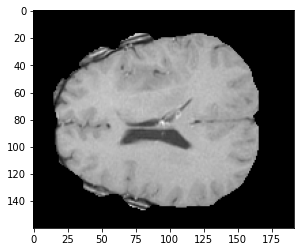

In [4]:
import matplotlib.pyplot as plt
plt.imshow(t1[:, :, 90], cmap='gray')

In [11]:
seg = f'/mnt/raid/jiang/projects/SubtleGAN/data/brats2021/train/BraTS2021_00014/BraTS2021_00014_seg.nii.gz'

In [12]:
import nibabel as nib
seg_array = nib.load(seg).get_fdata()

In [14]:
import numpy as np
np.unique(seg_array)

array([0., 1., 2., 4.])